

Notas

* Andres Javier galindo Vargas
* A01793927



Importar bibliotecas:


In [ ]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['scikit-learn'])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
# descargar dataset

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [ ]:
# lectura del archivo 
await download(path, "auto.csv")
path="auto.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Linear Regression</h4>


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
lm.intercept_

38423.30585815743

In [ ]:
lm.coef_

array([-821.73337832])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Preguntas #1 a): </h1>

<b>Crear regresion  "lm1".</b>

</div>


In [ ]:
lm1 = LinearRegression()
lm1

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm1 = LinearRegression()
lm1
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>  b): </h1>

<b>Generar entrenamiento del modelo ?</b>

</div>


In [ ]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> c):</h1>

<b>Encuentra la pendiente y la intersección del modelo.</b>

</div>


In [ ]:
lm1.coef_

array([[166.86001569]])

In [ ]:
lm1.intercept_

array([-7963.33890628])

<h4>Regresión lineal múltiple</h4>


In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
lm.fit(Z, df['price'])

LinearRegression()

In [ ]:
lm.intercept_

-15806.62462632922

In [ ]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta #2 a): </h1>
Cree y entrene un modelo de regresión lineal múltiple "lm2".
</div>


In [ ]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> #2 b): </h1>
<b>Encuentre el coeficiente del modelo.</b>
</div>


In [ ]:
lm2.coef_

array([   1.49789586, -820.45434016])

<h2>2. Evaluación de modelos mediante visualización</h2>


In [ ]:
import seaborn as sns
%matplotlib inline 

(0.0, 48166.367544651126)

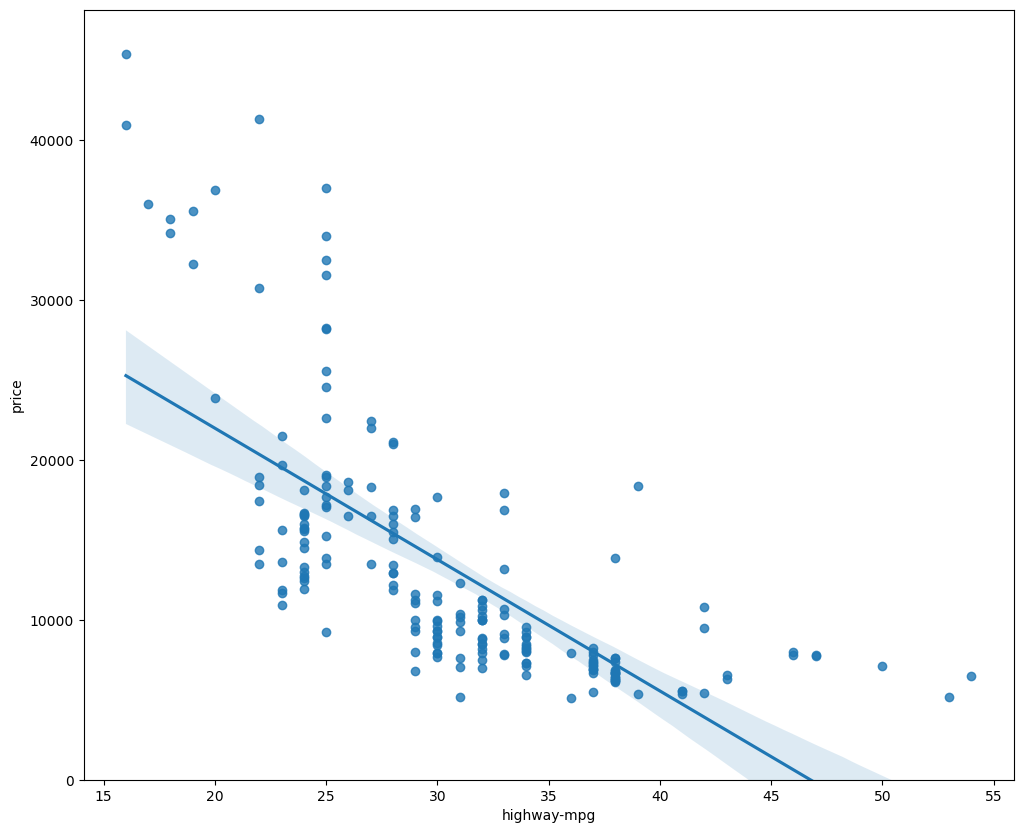

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

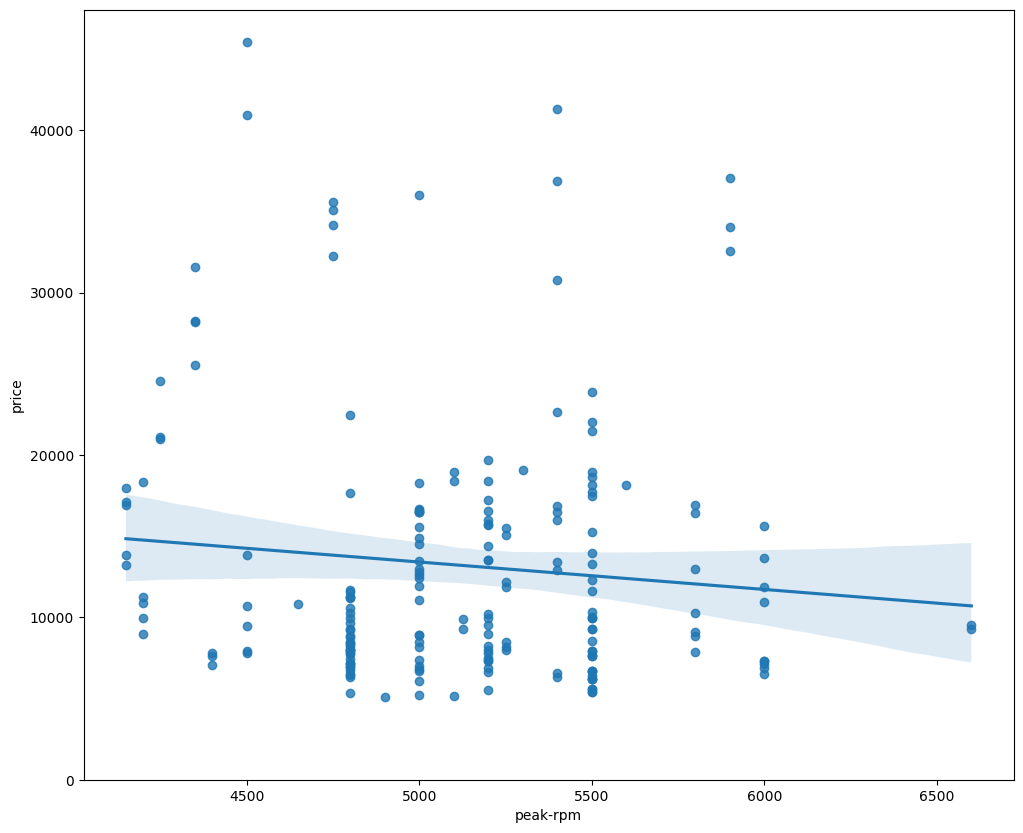

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


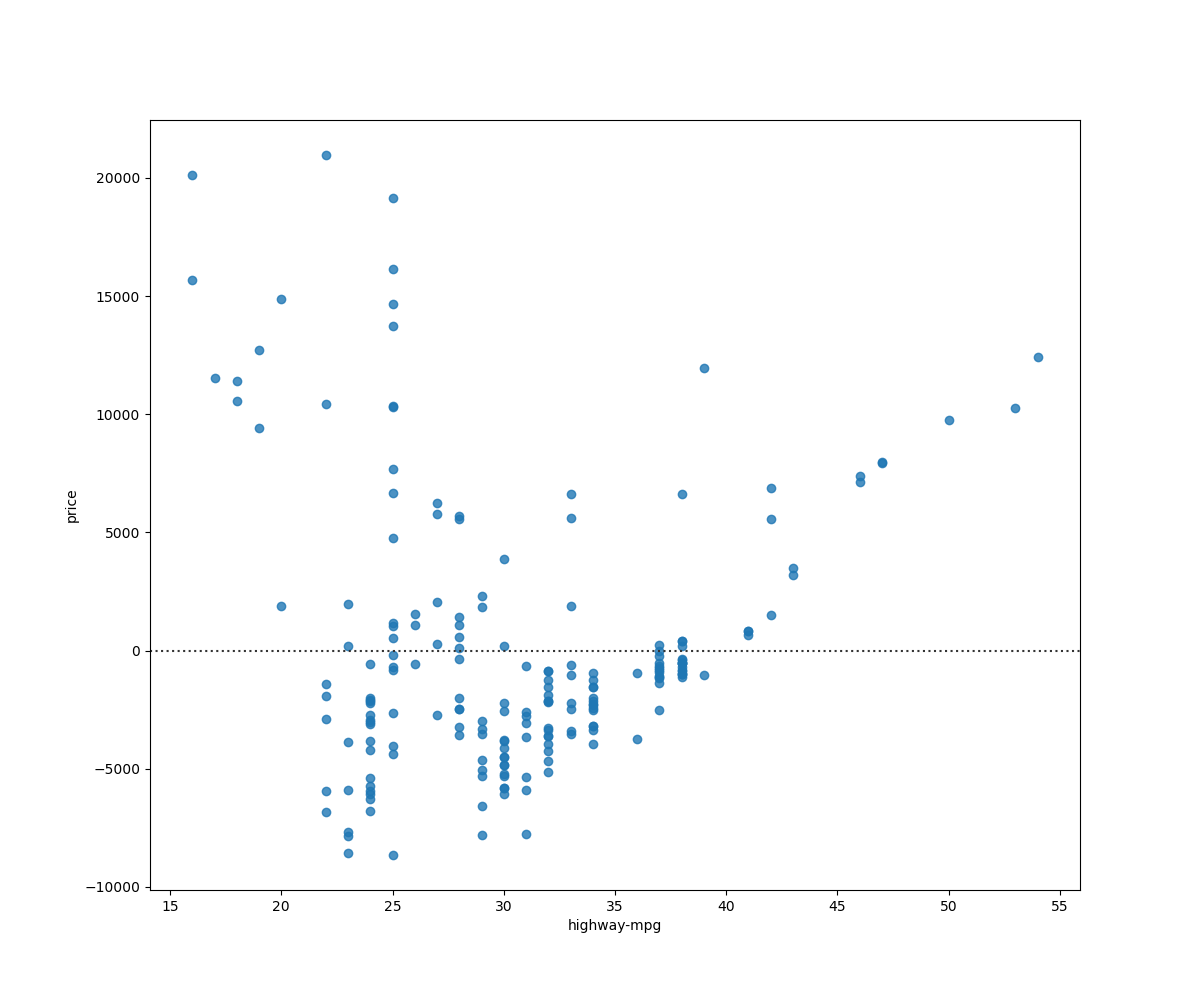

<Figure size 1200x1000 with 0 Axes>

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<h3>Regresión lineal múltiple</h3>


In [ ]:
Y_hat = lm.predict(Z)

<ipython-input-31-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-31-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

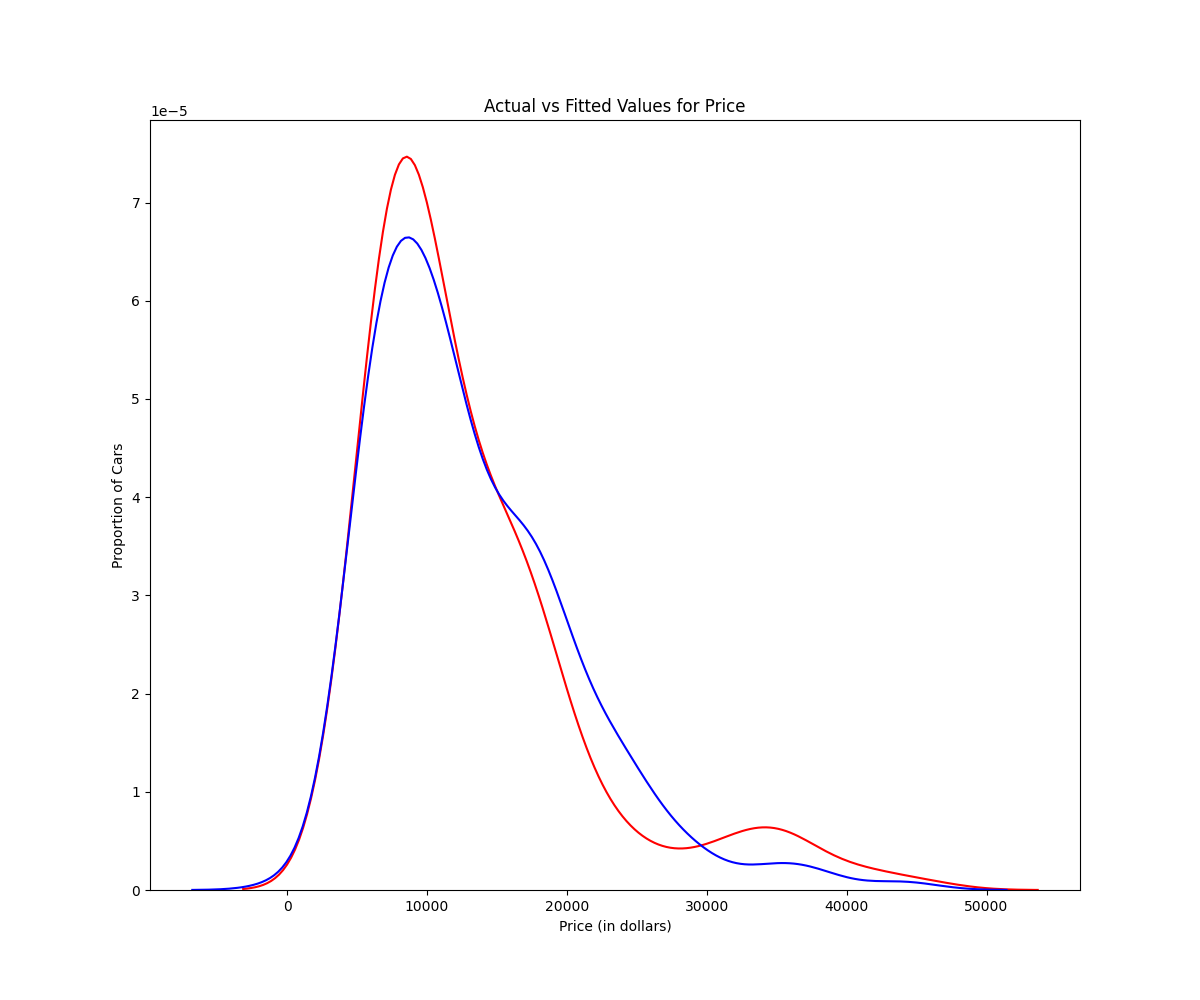

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>3. Regresión polinomial y canalizaciones</h2>


In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


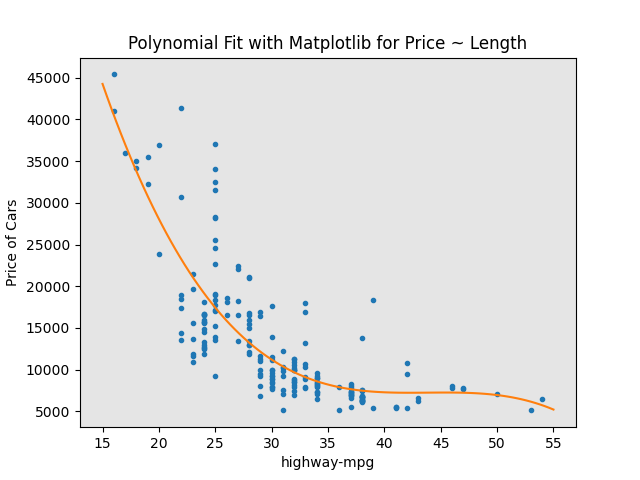

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta #4:</h1>
<b>Cree un modelo polinomial de 11 órdenes con las variables x e y de arriba.</b>
</div>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


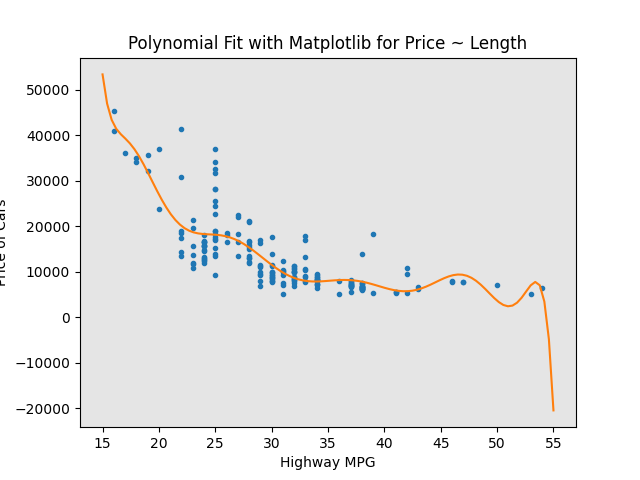

In [ ]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In [ ]:
Z_pr.shape

(201, 15)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>4. Medidas para la evaluación</h2>


<h3>Model 1: Regresión lineal simple</h3>


calculo del  R^2:


In [ ]:
lm.fit(X, Y)
print('el R-square es: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


MSE:


In [ ]:
Yhat=lm.predict(X)
print('La salida de los primeros cuatro valores predichos es: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('medida del error : ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Regresión lineal múltiple</h3>


In [ ]:
# fit del modelo 
lm.fit(Z, df['price'])
# Find del r cuadrado
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


<h3>MSE</h3>


In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

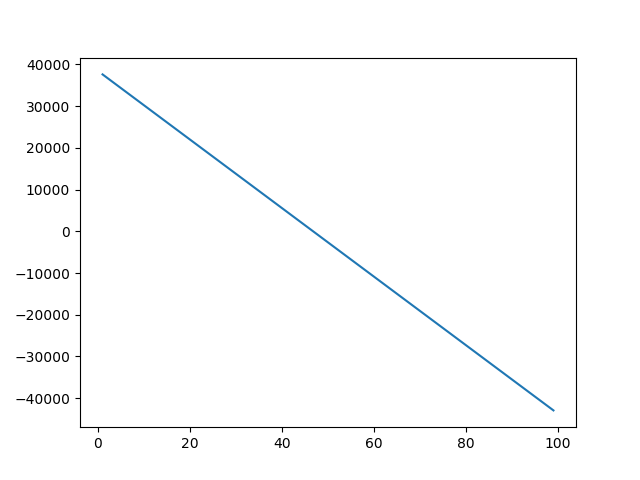

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(new_input, yhat)
plt.show()